In [3]:
## Definitions

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random as random
import time

In [4]:
## Customer Profiles Table
def generate_customer_profiles_table(n_customers, random_state = 0):
    
    np.random.seed(random_state)
        
    customer_id_properties=[]
    
    # Generate customer properties from random distributions 
    for customer_id in range(n_customers):
        
        x_customer_id = np.random.uniform(0,100)
        y_customer_id = np.random.uniform(0,100)
        
        mean_amount = np.random.uniform(5,100) # Arbitrary (but sensible) value 
        std_amount = mean_amount/2 # Arbitrary (but sensible) value
        
        mean_nb_tx_per_day = np.random.uniform(0,4) # Arbitrary (but sensible) value 
        
        customer_id_properties.append([customer_id,
                                      x_customer_id, 
                                      y_customer_id,
                                      mean_amount, 
                                      std_amount,
                                      mean_nb_tx_per_day])
        
    customer_profiles_table = pd.DataFrame(customer_id_properties, columns=['customer_id',
                                                                      'x_customer_id', 
                                                                      'y_customer_id',
                                                                      'mean_amount', 
                                                                      'std_amount',
                                                                      'mean_nb_tx_per_day'])
    
    return customer_profiles_table

In [5]:
n_customers = 5
customer_profiles_table = generate_customer_profiles_table(n_customers, random_state = 0)
customer_profiles_table


,customer_id,x_customer_id,y_customer_id,mean_amount,std_amount,mean_nb_tx_per_day
0,0,54.881350,71.518937,62.262521,31.131260,2.179533
1,1,42.365480,64.589411,46.570785,23.285393,3.567092
2,2,96.366276,38.344152,80.213879,40.106939,2.115580
3,3,56.804456,92.559664,11.748426,5.874213,0.348517
4,4,2.021840,83.261985,78.924891,39.462446,3.480049


In [6]:
## Terminal Profiles Table

def generate_terminal_profiles_table(n_terminals, random_state=0):
    
    np.random.seed(random_state)
        
    terminal_id_properties=[]
    
    # Generate terminal properties from random distributions 
    for terminal_id in range(n_terminals):
        
        x_terminal_id = np.random.uniform(0,100)
        y_terminal_id = np.random.uniform(0,100)
        
        terminal_id_properties.append([terminal_id,
                                      x_terminal_id, y_terminal_id])
                                       
    terminal_profiles_table = pd.DataFrame(terminal_id_properties, columns=['terminal_id',
                                                                      'x_terminal_id', 
                                                                      'y_terminal_id'])
    
    return terminal_profiles_table

In [7]:
n_terminals = 5
terminal_profiles_table = generate_terminal_profiles_table(n_terminals, random_state = 0)
terminal_profiles_table

,terminal_id,x_terminal_id,y_terminal_id
0,0,54.881350,71.518937
1,1,60.276338,54.488318
2,2,42.365480,64.589411
3,3,43.758721,89.177300
4,4,96.366276,38.344152


In [8]:
## List of Terminals within Radius

def get_list_terminals_within_radius(customer_profile, x_y_terminals, r):
    
    # Use numpy arrays in the following to speed up computations
    
    # Location (x,y) of customer as numpy array
    x_y_customer = customer_profile[['x_customer_id','y_customer_id']].values.astype(float)
    
    # Squared difference in coordinates between customer and terminal locations
    squared_diff_x_y = np.square(x_y_customer - x_y_terminals)
    
    # Sum along rows and compute suared root to get distance
    dist_x_y = np.sqrt(np.sum(squared_diff_x_y, axis=1))
    
    # Get the indices of terminals which are at a distance less than r
    available_terminals = list(np.where(dist_x_y<r)[0])
    
    # Return the list of terminal IDs
    return available_terminals
    

In [9]:
# We first get the geographical locations of all terminals as a numpy array
x_y_terminals = terminal_profiles_table[['x_terminal_id','y_terminal_id']].values.astype(float)

# And get the list of terminals within radius of $50$ for the last customer
get_list_terminals_within_radius(customer_profiles_table.iloc[4], x_y_terminals=x_y_terminals, r=50)

[2, 3]

In [10]:
## List of Terminals outside of Radius

def get_list_suspicious_terminals(customer_profile, x_y_terminals, r):
    
    # Use numpy arrays in the following to speed up computations
    
    # Location (x,y) of customer as numpy array
    x_y_customer = customer_profile[['x_customer_id','y_customer_id']].values.astype(float)
    
    # Squared difference in coordinates between customer and terminal locations
    squared_diff_x_y = np.square(x_y_customer - x_y_terminals)
    
    # Sum along rows and compute suared root to get distance
    dist_x_y = np.sqrt(np.sum(squared_diff_x_y, axis=1))

    # Get the indices of terminals which are at a distance greater than r
    suspicious_terminals = list(np.where(dist_x_y>r)[0])
    
    # Return the list of terminal IDs
    return suspicious_terminals

In [11]:
# We first get the geographical locations of all terminals as a numpy array
x_y_terminals = terminal_profiles_table[['x_terminal_id','y_terminal_id']].values.astype(float)

# And get the list of terminals within radius of $50$ for the last customer
get_list_suspicious_terminals(customer_profiles_table.iloc[4], x_y_terminals=x_y_terminals, r=50)

[0, 1, 4]

In [12]:
terminal_profiles_table

,terminal_id,x_terminal_id,y_terminal_id
0,0,54.881350,71.518937
1,1,60.276338,54.488318
2,2,42.365480,64.589411
3,3,43.758721,89.177300
4,4,96.366276,38.344152


In [13]:
%%capture

terminals_available_to_customer_fig, ax = plt.subplots(figsize=(5,5))

# Plot locations of terminals
ax.scatter(terminal_profiles_table.x_terminal_id.values, 
           terminal_profiles_table.y_terminal_id.values, 
           color='blue', label = 'Locations of terminals')

# Plot location of the last customer
customer_id=4
ax.scatter(customer_profiles_table.iloc[customer_id].x_customer_id, 
           customer_profiles_table.iloc[customer_id].y_customer_id, 
           color='red',label="Location of last customer")

ax.legend(loc = 'upper left', bbox_to_anchor=(1.05, 1))

# Plot the region within a radius of 50 of the last customer
circ = plt.Circle((customer_profiles_table.iloc[customer_id].x_customer_id,
                   customer_profiles_table.iloc[customer_id].y_customer_id), 
                   radius=50, color='g', alpha=0.2)
ax.add_patch(circ)

fontsize=15

ax.set_title("Green circle: \n Terminals within a radius of 50 \n of the last customer")
ax.set_xlim([0, 100])
ax.set_ylim([0, 100])
    
ax.set_xlabel('x_terminal_id', fontsize=fontsize)
ax.set_ylabel('y_terminal_id', fontsize=fontsize)

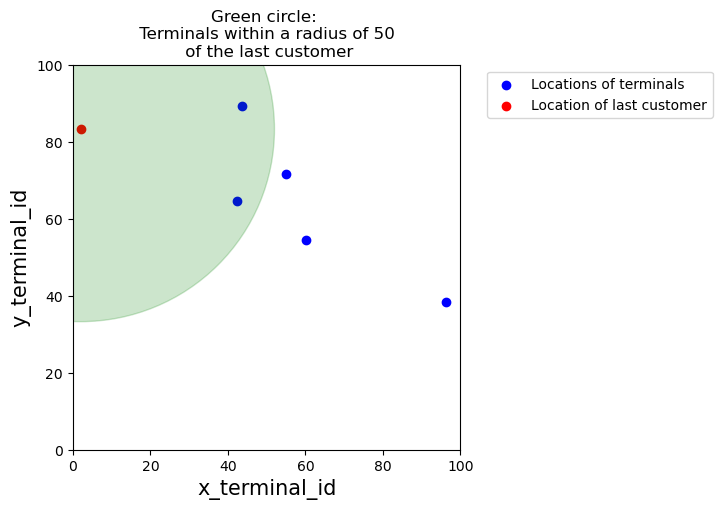

In [14]:
terminals_available_to_customer_fig

In [15]:
## Create New Column in Customer Profiles Table for Available Terminals

customer_profiles_table['available_terminals']=customer_profiles_table\
    .apply(lambda x : get_list_terminals_within_radius(x, x_y_terminals = x_y_terminals, 
r=50), axis=1)
customer_profiles_table

,customer_id,x_customer_id,y_customer_id,mean_amount,std_amount,mean_nb_tx_per_day,available_terminals
0,0,54.881350,71.518937,62.262521,31.131260,2.179533,"[0, 1, 2, 3]"
1,1,42.365480,64.589411,46.570785,23.285393,3.567092,"[0, 1, 2, 3]"
2,2,96.366276,38.344152,80.213879,40.106939,2.115580,"[1, 4]"
3,3,56.804456,92.559664,11.748426,5.874213,0.348517,"[0, 1, 2, 3]"
4,4,2.021840,83.261985,78.924891,39.462446,3.480049,"[2, 3]"


In [16]:
## Create New Column in Customer Profiles Table for Suspicious Terminals

customer_profiles_table['suspicious_terminals']=customer_profiles_table\
    .apply(lambda x : get_list_suspicious_terminals(x, x_y_terminals = x_y_terminals, 
r=50), axis=1)
customer_profiles_table

,customer_id,x_customer_id,y_customer_id,mean_amount,std_amount,mean_nb_tx_per_day,available_terminals,suspicious_terminals
0,0,54.881350,71.518937,62.262521,31.131260,2.179533,"[0, 1, 2, 3]",[4]
1,1,42.365480,64.589411,46.570785,23.285393,3.567092,"[0, 1, 2, 3]",[4]
2,2,96.366276,38.344152,80.213879,40.106939,2.115580,"[1, 4]","[0, 2, 3]"
3,3,56.804456,92.559664,11.748426,5.874213,0.348517,"[0, 1, 2, 3]",[4]
4,4,2.021840,83.261985,78.924891,39.462446,3.480049,"[2, 3]","[0, 1, 4]"


In [17]:
## Transactions Table

def generate_transactions_table(customer_profile, start_date = "2023-12-01", nb_days = 10):
    
    customer_transactions = []
    
    random.seed(int(customer_profile.customer_id))
    np.random.seed(int(customer_profile.customer_id))
    
    # For all days
    for day in range(nb_days):
        
        # Random number of transactions for that day 
        nb_tx = np.random.poisson(customer_profile.mean_nb_tx_per_day)
        
        # If nb_tx positive, let us generate transactions
        if nb_tx>0:
            
            for tx in range(nb_tx):
                
                # Time of transaction: Around noon, std 20000 seconds. This choice aims at 
                # simulating the fact that most transactions occur during the day.
                time_tx = int(np.random.normal(86400/2, 20000))
                
                # If transaction time between 0 and 86400, let us keep it, otherwise, let us discard it
                if (time_tx>0) and (time_tx<86400):
                    
                    # Amount is drawn from a normal distribution  
                    amount = np.random.normal(customer_profile.mean_amount, customer_profile.std_amount)
                    
                    # If amount negative, draw from a uniform distribution
                    if amount<0:
                        amount = np.random.uniform(0,customer_profile.mean_amount*2)
                    
                    amount=np.round(amount,decimals=2)
                    
                    if len(customer_profile.available_terminals)>0:
                        
                        terminal_id = random.choice(customer_profile.available_terminals)
                    
                        customer_transactions.append([time_tx + day * 86400, day,
                                                      customer_profile.customer_id, 
                                                      terminal_id, amount])
            
    customer_transactions = pd.DataFrame(customer_transactions, columns=['tx_time_seconds',
                                                                          'tx_time_days', 
                                                                          'customer_id', 
                                                                          'terminal_id', 
                                                                          'tx_amount'])
    
    if len(customer_transactions)>0:
        customer_transactions['tx_datetime'] = pd.to_datetime(customer_transactions["tx_time_seconds"], 
                                                              unit='s', origin=start_date)
        customer_transactions=customer_transactions[['tx_datetime',
                                                     'customer_id', 
                                                     'terminal_id', 
                                                     'tx_amount',
                                                     'tx_time_seconds', 
                                                     'tx_time_days']]
    
    return customer_transactions  
    
    

In [31]:
transaction_table_customer_0=generate_transactions_table(customer_profiles_table.iloc[0], 
                                                         start_date = "2023-12-01", 
                                                         nb_days = 5)
transaction_table_customer_0=transaction_table_customer_0.style.set_caption('Customer Transactions')
transaction_table_customer_0

,tx_datetime,customer_id,terminal_id,tx_amount,tx_time_seconds,tx_time_days
0,2023-12-01 07:19:05,0,3,123.590000,26345,0
1,2023-12-01 19:02:02,0,3,46.510000,68522,0
2,2023-12-01 18:00:16,0,0,77.340000,64816,0
3,2023-12-02 15:13:02,0,2,32.350000,141182,1
4,2023-12-02 14:05:38,0,3,63.300000,137138,1
5,2023-12-02 15:46:51,0,3,13.590000,143211,1
6,2023-12-02 08:51:06,0,2,54.720000,118266,1
7,2023-12-02 20:24:47,0,3,51.890000,159887,1
8,2023-12-03 12:15:47,0,2,117.910000,216947,2
9,2023-12-03 08:50:09,0,1,67.720000,204609,2


In [19]:
## Suspicious Transactions Table

def generate_suspicious_transactions_table(customer_profile, start_date = "2023-12-01", nb_days = 10):
    
    fraudster_transactions = []
    
    random.seed(int(customer_profile.customer_id))
    np.random.seed(int(customer_profile.customer_id))
    
    # For all days
    for day in range(nb_days):
        
        # Random number of transactions for that day 
        nb_tx = np.random.poisson(customer_profile.mean_nb_tx_per_day)
        
        # If nb_tx positive, let us generate transactions
        if nb_tx>0:
            
            for tx in range(nb_tx):
                
                # Time of transaction: Around noon, std 20000 seconds. This choice aims at 
                # simulating the fact that most transactions occur during the day.
                time_tx = int(np.random.normal(86400/2, 20000))
                
                # If transaction time between 0 and 86400, let us keep it, otherwise, let us discard it
                if (time_tx>0) and (time_tx<86400):
                    
                    # Amount is drawn from a normal distribution  
                    amount = np.random.normal(customer_profile.mean_amount, customer_profile.std_amount)
                    
                    # If amount negative, draw from a uniform distribution
                    if amount<0:
                        amount = np.random.uniform(0,customer_profile.mean_amount*2)
                    
                    amount=np.round(amount,decimals=2)
                    
                    if len(customer_profile.suspicious_terminals)>0:
                        
                        terminal_id = random.choice(customer_profile.suspicious_terminals)
                    
                        fraudster_transactions.append([time_tx + day * 86400, day,
                                                      customer_profile.customer_id, 
                                                      terminal_id, amount])
            
    fraudster_transactions = pd.DataFrame(fraudster_transactions, columns=['tx_time_seconds',
                                                                          'tx_time_days', 
                                                                          'customer_id', 
                                                                          'terminal_id', 
                                                                          'tx_amount'])
    
    if len(fraudster_transactions)>0:
        fraudster_transactions['tx_datetime'] = pd.to_datetime(fraudster_transactions["tx_time_seconds"], 
                                                              unit='s', origin=start_date)
        fraudster_transactions=fraudster_transactions[['tx_datetime',
                                                     'customer_id', 
                                                     'terminal_id', 
                                                     'tx_amount',
                                                     'tx_time_seconds', 
                                                     'tx_time_days']]
    
    return fraudster_transactions  
    
    

In [33]:
suspicious_transaction_table_customer_0=generate_suspicious_transactions_table(customer_profiles_table.iloc[0], 
                                                         start_date = "2023-12-01", 
                                                         nb_days = 5)
suspicious_transaction_table_customer_0=suspicious_transaction_table_customer_0.style.set_caption('Fraudster Transactions')
suspicious_transaction_table_customer_0

,tx_datetime,customer_id,terminal_id,tx_amount,tx_time_seconds,tx_time_days
0,2023-12-01 07:19:05,0,4,123.590000,26345,0
1,2023-12-01 19:02:02,0,4,46.510000,68522,0
2,2023-12-01 18:00:16,0,4,77.340000,64816,0
3,2023-12-02 15:13:02,0,4,32.350000,141182,1
4,2023-12-02 14:05:38,0,4,63.300000,137138,1
5,2023-12-02 15:46:51,0,4,13.590000,143211,1
6,2023-12-02 08:51:06,0,4,54.720000,118266,1
7,2023-12-02 20:24:47,0,4,51.890000,159887,1
8,2023-12-03 12:15:47,0,4,117.910000,216947,2
9,2023-12-03 08:50:09,0,4,67.720000,204609,2


In [34]:
# Transaction Table for All Customers
transactions_df=customer_profiles_table.groupby('customer_id')\
    .apply(lambda x : generate_transactions_table(x.iloc[0], nb_days=5))\
        .reset_index(drop=True)

transactions_df=transactions_df.style.set_caption('All Customers Transactions')
transactions_df

,tx_datetime,customer_id,terminal_id,tx_amount,tx_time_seconds,tx_time_days
0,2023-12-01 07:19:05,0,3,123.590000,26345,0
1,2023-12-01 19:02:02,0,3,46.510000,68522,0
2,2023-12-01 18:00:16,0,0,77.340000,64816,0
3,2023-12-02 15:13:02,0,2,32.350000,141182,1
4,2023-12-02 14:05:38,0,3,63.300000,137138,1
5,2023-12-02 15:46:51,0,3,13.590000,143211,1
6,2023-12-02 08:51:06,0,2,54.720000,118266,1
7,2023-12-02 20:24:47,0,3,51.890000,159887,1
8,2023-12-03 12:15:47,0,2,117.910000,216947,2
9,2023-12-03 08:50:09,0,1,67.720000,204609,2


In [35]:
# Transaction Table for All Fraudsters
fraudsters_transactions_df=customer_profiles_table.groupby('customer_id')\
    .apply(lambda x : generate_suspicious_transactions_table(x.iloc[0], nb_days=5))\
        .reset_index(drop=True)

fraudsters_transactions_df=fraudsters_transactions_df.style.set_caption('All Fraudsters Transactions')
fraudsters_transactions_df

,tx_datetime,customer_id,terminal_id,tx_amount,tx_time_seconds,tx_time_days
0,2023-12-01 07:19:05,0,4,123.590000,26345,0
1,2023-12-01 19:02:02,0,4,46.510000,68522,0
2,2023-12-01 18:00:16,0,4,77.340000,64816,0
3,2023-12-02 15:13:02,0,4,32.350000,141182,1
4,2023-12-02 14:05:38,0,4,63.300000,137138,1
5,2023-12-02 15:46:51,0,4,13.590000,143211,1
6,2023-12-02 08:51:06,0,4,54.720000,118266,1
7,2023-12-02 20:24:47,0,4,51.890000,159887,1
8,2023-12-03 12:15:47,0,4,117.910000,216947,2
9,2023-12-03 08:50:09,0,4,67.720000,204609,2


In [15]:
# Larger Dataset

def generate_dataset(n_customers = 10000, 
                     n_terminals = 1000000, 
                     nb_days = 90, 
                     start_date = "2023-12-01", 
                     r = 5):
    
    start_time = time.time()
    customer_profiles_table = generate_customer_profiles_table(n_customers, 
                                                               random_state = 0)
    print("Time to generate customer profiles table: {0:.2}s"\
          .format(time.time()-start_time))
    
    start_time = time.time()
    terminal_profiles_table = generate_terminal_profiles_table(n_terminals, 
                                                               random_state = 1)
    print("Time to generate terminal profiles table: {0:.2}s"\
          .format(time.time()-start_time))
    
    start_time = time.time()
    x_y_terminals = terminal_profiles_table[['x_terminal_id', 'y_terminal_id']].values.astype(float)
    customer_profiles_table['available_terminals'] = customer_profiles_table\
        .apply(lambda x : get_list_terminals_within_radius(x, 
                                                           x_y_terminals = x_y_terminals, 
                                                           r = r), axis = 1)
    # With Pandarallel
    # customer_profiles_table['available_terminals'] = customer_profiles_table\
    # .parallel_apply(lmabda x : get_list_closest_terminals(x, x_y_terminals = x_y_terminals, 
    # r = r, axis = 1))
    customer_profiles_table['nb_terminals'] = customer_profiles_table.available_terminals.apply(len)
    print("Time to associate terminals to customers: {0:.2}s".format(time.time()-start_time))

    start_time = time.time()
    transactions_df = customer_profiles_table.groupby('customer_id')\
        .apply(lambda x : generate_transactions_table(x.iloc[0], nb_days = nb_days))\
            .reset_index(drop = True)
    # With Pandarallel
    # transactions_df = customer_profiles_table.groupby('customer_id')\
    #   .parallel_apply(lambda x : generate_transactions_table(x.iloc[0], nb_days = nb_days))\
    #       .reset_index(drop = True)
    print("Time to generate transactions: {0:.2}s".format(time.time()-start_time))

    # Sort transactions chronologially
    transactions_df = transactions_df.sort_values('tx_datetime')
    # Reset indices, starting from 0
    transactions_df.reset_index(inplace = True, drop = True)
    transactions_df.reset_index(inplace = True)
    # transaction_id are the dataframe indices, starting from 0
    transactions_df.rename(columns = {'index' : 'transaction_id'}, inplace = True)

    return (customer_profiles_table, terminal_profiles_table, transactions_df)


    

In [16]:
# Dataset with 5000 Customers, 10,000 Terminals, 90 Days of Transactions
# Corresponding dates from 2023/12/01 - 2024/02/28
(customer_profiles_table, terminal_profiles_table, transactions_df) = \
    generate_dataset(n_customers = 5000, 
                     n_terminals = 10000, 
                     nb_days = 90, 
                     start_date = "2023-12-01", 
                     r = 5)

Time to generate customer profiles table: 0.095s
Time to generate terminal profiles table: 0.032s
Time to associate terminals to customers: 1.2s
Time to generate transactions: 3.6e+01s


In [17]:
transactions_df.shape

(863006, 7)

In [18]:
transactions_df

,transaction_id,tx_datetime,customer_id,terminal_id,tx_amount,tx_time_seconds,tx_time_days
0,0,2023-12-01 00:00:31,596,3156,57.16,31,0
1,1,2023-12-01 00:02:10,4961,3412,81.51,130,0
2,2,2023-12-01 00:07:56,2,1365,146.00,476,0
3,3,2023-12-01 00:09:29,4128,8737,64.49,569,0
4,4,2023-12-01 00:10:34,927,9906,50.99,634,0
...,...,...,...,...,...,...,...
863001,863001,2024-02-28 23:54:44,1476,1703,41.54,7775684,89
863002,863002,2024-02-28 23:54:59,3818,1523,57.79,7775699,89
863003,863003,2024-02-28 23:55:39,2695,4906,126.85,7775739,89
863004,863004,2024-02-28 23:57:39,4103,9712,5.07,7775859,89


[Text(0.5, 0, 'Time (days)'), Text(0, 0.5, 'Number of Transactions')]

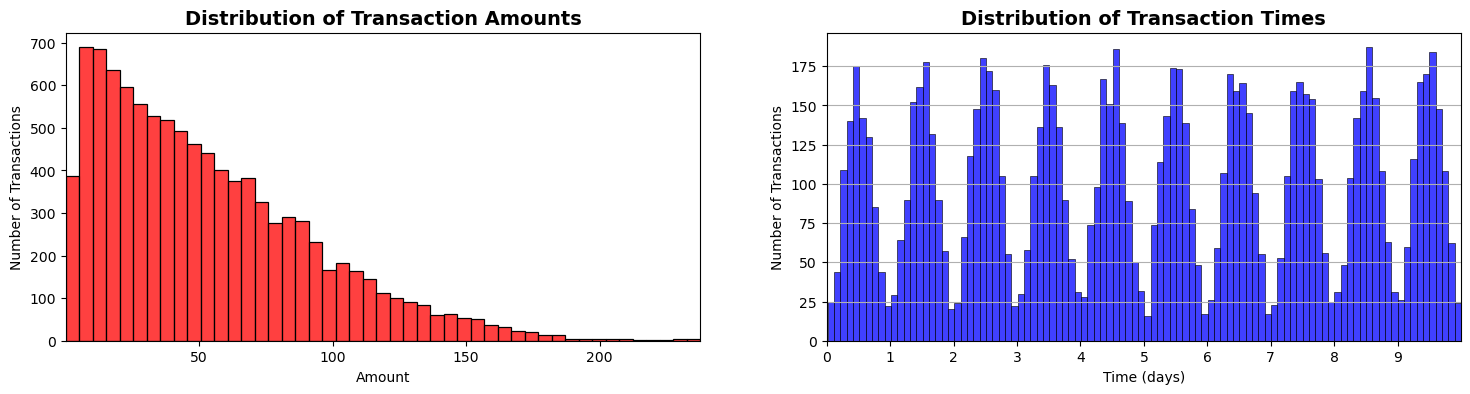

In [49]:
# Plotting Distribution of Transaction Amounts and Times


distribution_amount_times_fig, ax=plt.subplots(1, 2, figsize=(18,4))

amount_val = transactions_df[transactions_df.tx_time_days<10]['tx_amount'].sample(n=10000).values
time_val = transactions_df[transactions_df.tx_time_days<10]['tx_time_seconds'].sample(n=10000).values

plt.grid(axis='y')

sns.histplot(amount_val, ax=ax[0], color='red', kde=False)
ax[0].set_title('Distribution of Transaction Amounts', fontsize=14, weight='semibold')
ax[0].set_xlim([min(amount_val), max(amount_val)])
ax[0].set(xlabel='Amount', ylabel='Number of Transactions')


# Divide the time variables by 86400 to transform seconds into days in the plot
sns.histplot(time_val/86400, ax=ax[1], color='blue', bins=100, kde=False)
ax[1].set_title('Distribution of Transaction Times', fontsize=14, weight='semibold')
ax[1].set_xlim([min(time_val/86400), max(time_val/86400)])
ax[1].set_xticks(range(10))
ax[1].set(xlabel='Time (days)', ylabel="Number of Transactions")


In [41]:
# Larger Fraudster Dataset

def generate_fraudster_dataset(n_customers = 10000, 
                     n_terminals = 1000000, 
                     nb_days = 90, 
                     start_date = "2023-12-01", 
                     r = 5):
    
    start_time = time.time()
    customer_profiles_table = generate_customer_profiles_table(n_customers, 
                                                               random_state = 0)
    print("Time to generate customer profiles table: {0:.2}s"\
          .format(time.time()-start_time))
    
    start_time = time.time()
    terminal_profiles_table = generate_terminal_profiles_table(n_terminals, 
                                                               random_state = 1)
    print("Time to generate terminal profiles table: {0:.2}s"\
          .format(time.time()-start_time))
    
    start_time = time.time()
    x_y_terminals = terminal_profiles_table[['x_terminal_id', 'y_terminal_id']].values.astype(float)
    customer_profiles_table['suspicious_terminals'] = customer_profiles_table\
        .apply(lambda x : get_list_suspicious_terminals(x, 
                                                           x_y_terminals = x_y_terminals, 
                                                           r = r), axis = 1)
    # With Pandarallel
    # customer_profiles_table['available_terminals'] = customer_profiles_table\
    # .parallel_apply(lmabda x : get_list_closest_terminals(x, x_y_terminals = x_y_terminals, 
    # r = r, axis = 1))
    customer_profiles_table['nb_terminals'] = customer_profiles_table.suspicious_terminals.apply(len)
    print("Time to associate suspicious terminals to customers: {0:.2}s".format(time.time()-start_time))

    start_time = time.time()
    fraudsters_transactions_df = customer_profiles_table.groupby('customer_id')\
        .apply(lambda x : generate_suspicious_transactions_table(x.iloc[0], nb_days = nb_days))\
            .reset_index(drop = True)
    # With Pandarallel
    # transactions_df = customer_profiles_table.groupby('customer_id')\
    #   .parallel_apply(lambda x : generate_transactions_table(x.iloc[0], nb_days = nb_days))\
    #       .reset_index(drop = True)
    print("Time to generate suspicious transactions: {0:.2}s".format(time.time()-start_time))

    # Sort transactions chronologially
    fraudsters_transactions_df = fraudsters_transactions_df.sort_values('tx_datetime')
    # Reset indices, starting from 0
    fraudsters_transactions_df.reset_index(inplace = True, drop = True)
    fraudsters_transactions_df.reset_index(inplace = True)
    # transaction_id are the dataframe indices, starting from 0
    fraudsters_transactions_df.rename(columns = {'index' : 'transaction_id'}, inplace = True)

    return (customer_profiles_table, terminal_profiles_table, fraudsters_transactions_df)


    

In [42]:
# Dataset with 5000 Customers, 10,000 Terminals, 90 Days of Transactions
# Corresponding dates from 2023/12/01 - 2024/02/28
(customer_profiles_table, terminal_profiles_table, fraudsters_transactions_df) = \
    generate_dataset(n_customers = 5000, 
                     n_terminals = 10000, 
                     nb_days = 90, 
                     start_date = "2023-12-01", 
                     r = 5)

Time to generate customer profiles table: 0.074s
Time to generate terminal profiles table: 0.067s
Time to associate suspicious terminals to customers: 4.7s
Time to generate suspicious transactions: 4.9e+01s


In [43]:
fraudsters_transactions_df.shape

(863006, 7)

In [44]:
fraudsters_transactions_df

,transaction_id,tx_datetime,customer_id,terminal_id,tx_amount,tx_time_seconds,tx_time_days
0,0,2023-12-01 00:00:31,596,2883,57.16,31,0
1,1,2023-12-01 00:02:10,4961,4987,81.51,130,0
2,2,2023-12-01 00:07:56,2,930,146.00,476,0
3,3,2023-12-01 00:09:29,4128,303,64.49,569,0
4,4,2023-12-01 00:10:34,927,2099,50.99,634,0
...,...,...,...,...,...,...,...
863001,863001,2024-02-28 23:54:44,1476,8557,41.54,7775684,89
863002,863002,2024-02-28 23:54:59,3818,8430,57.79,7775699,89
863003,863003,2024-02-28 23:55:39,2695,8872,126.85,7775739,89
863004,863004,2024-02-28 23:57:39,4103,5711,5.07,7775859,89


[Text(0.5, 0, 'Time (days)'),
 Text(0, 0.5, 'Number of Fraudsters Transactions')]

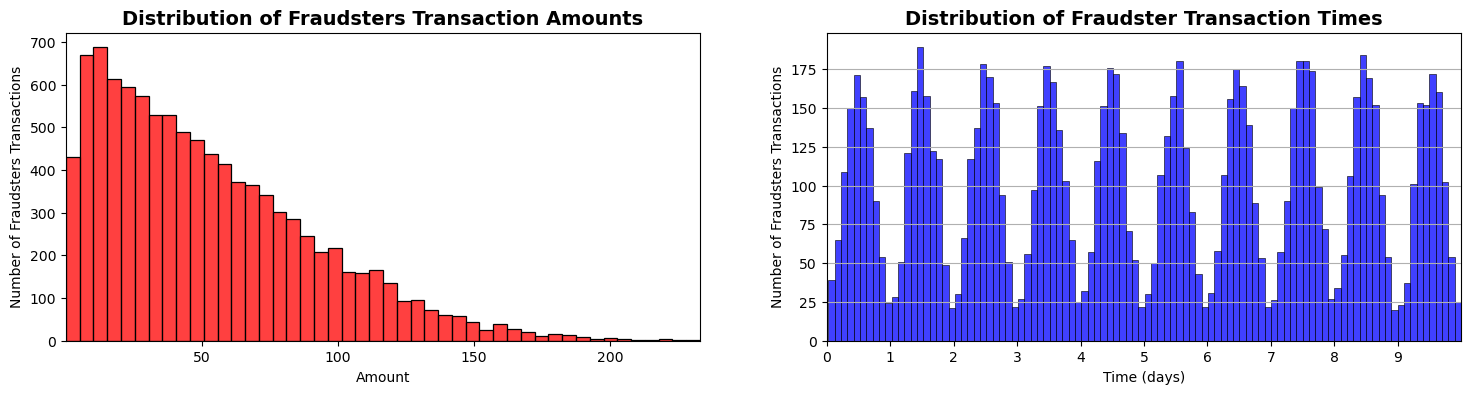

In [45]:
# Plotting Distribution of Fraudsters Transaction Amounts and Times


distribution_fraudster_amount_times_fig, ax=plt.subplots(1, 2, figsize=(18,4))

amount_val = fraudsters_transactions_df[fraudsters_transactions_df.tx_time_days<10]['tx_amount'].sample(n=10000).values
time_val = fraudsters_transactions_df[fraudsters_transactions_df.tx_time_days<10]['tx_time_seconds'].sample(n=10000).values

plt.grid(axis='y')

sns.histplot(amount_val, ax=ax[0], color='red', kde=False)
ax[0].set_title('Distribution of Fraudsters Transaction Amounts', fontsize=14, weight='semibold')
ax[0].set_xlim([min(amount_val), max(amount_val)])
ax[0].set(xlabel='Amount', ylabel='Number of Fraudsters Transactions')


# Divide the time variables by 86400 to transform seconds into days in the plot
sns.histplot(time_val/86400, ax=ax[1], color='blue', bins=100, kde=False)
ax[1].set_title('Distribution of Fraudster Transaction Times', fontsize=14, weight='semibold')
ax[1].set_xlim([min(time_val/86400), max(time_val/86400)])
ax[1].set_xticks(range(10))
ax[1].set(xlabel='Time (days)', ylabel="Number of Fraudsters Transactions")